<a href="https://colab.research.google.com/github/woosikyang/vision/blob/master/motion_keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

os.getcwd()

'/content'

In [14]:
import os



data_path = os.path.join(os.getcwd(),'drive','Shareddrives','Competition','motion_keypoint','data')
train_path = os.path.join(data_path,'train_imgs')
test_path = os.path.join(data_path, 'test_imgs')


In [5]:
import pandas as pd


train_df = pd.read_csv(os.path.join(data_path,'train_df.csv'))

In [7]:
train_df.head()
print(train_df.shape)

(4195, 49)


In [8]:
print(len(os.listdir(train_path)))
print(len(os.listdir(test_path)))

4195
1600


In [11]:
sample_submissions = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
print(sample_submissions.head())
print(sample_submissions.shape)


                           image  nose_x  ...  right_instep_x  right_instep_y
0  649-2-4-32-Z148_A-0000001.jpg       0  ...               0               0
1  649-2-4-32-Z148_A-0000003.jpg       0  ...               0               0
2  649-2-4-32-Z148_A-0000005.jpg       0  ...               0               0
3  649-2-4-32-Z148_A-0000007.jpg       0  ...               0               0
4  649-2-4-32-Z148_A-0000009.jpg       0  ...               0               0

[5 rows x 49 columns]
(1600, 49)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import os
import cv2

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [17]:
#폴더 경로를 설정해줍니다.
os.chdir(data_path) 

In [18]:
os.listdir()

['train_imgs',
 'test_imgs',
 'train_imgs.zip',
 'test_imgs.zip',
 'train_df.csv',
 'sample_submission.csv']

In [22]:
#glob를 활용해 이미지의 경로들을 불러옵니다.
import glob
train_paths = sorted(glob.glob('./train_imgs/*.jpg'))
test_paths = sorted(glob.glob('./test_imgs/*.jpg'))
print(len(train_paths), len(test_paths))

4195 1600


In [23]:
train = pd.read_csv('train_df.csv')
submission = pd.read_csv('sample_submission.csv')

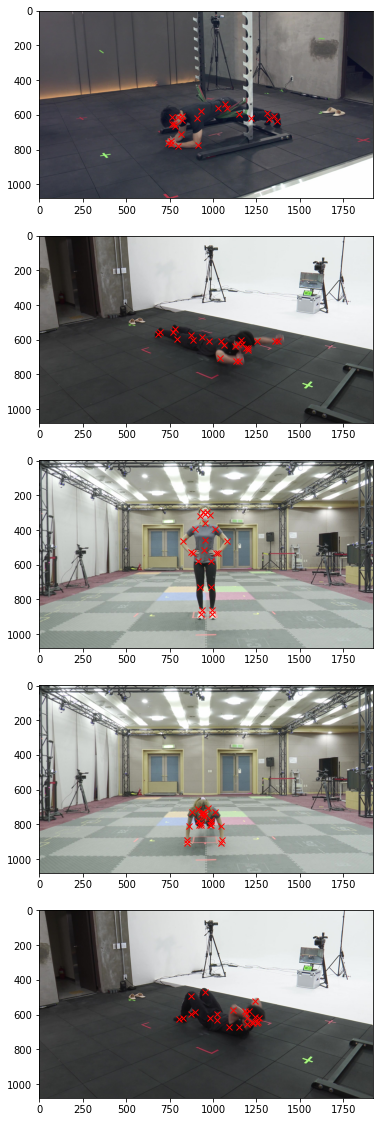

In [24]:
plt.figure(figsize=(40,20))
count=1

for i in np.random.randint(0,len(train_paths),5):
    
    plt.subplot(5,1, count)
    
    img_sample_path = train_paths[i]
    img = Image.open(img_sample_path)
    img_np = np.array(img)

    keypoint = train.iloc[:,1:49] #위치키포인트 하나씩 확인
    keypoint_sample = keypoint.iloc[i, :]
    
    for j in range(0,len(keypoint.columns),2):
        plt.plot(keypoint_sample[j], keypoint_sample[j+1],'rx')
        plt.imshow(img_np)
    
    count += 1